In [1]:
from Generator import generate_synthetic_image
from Models import KeypointDataset, extract_keypoints_from_target

import matplotlib.pyplot as plt
import numpy as np
import random

Generating examples without homography:


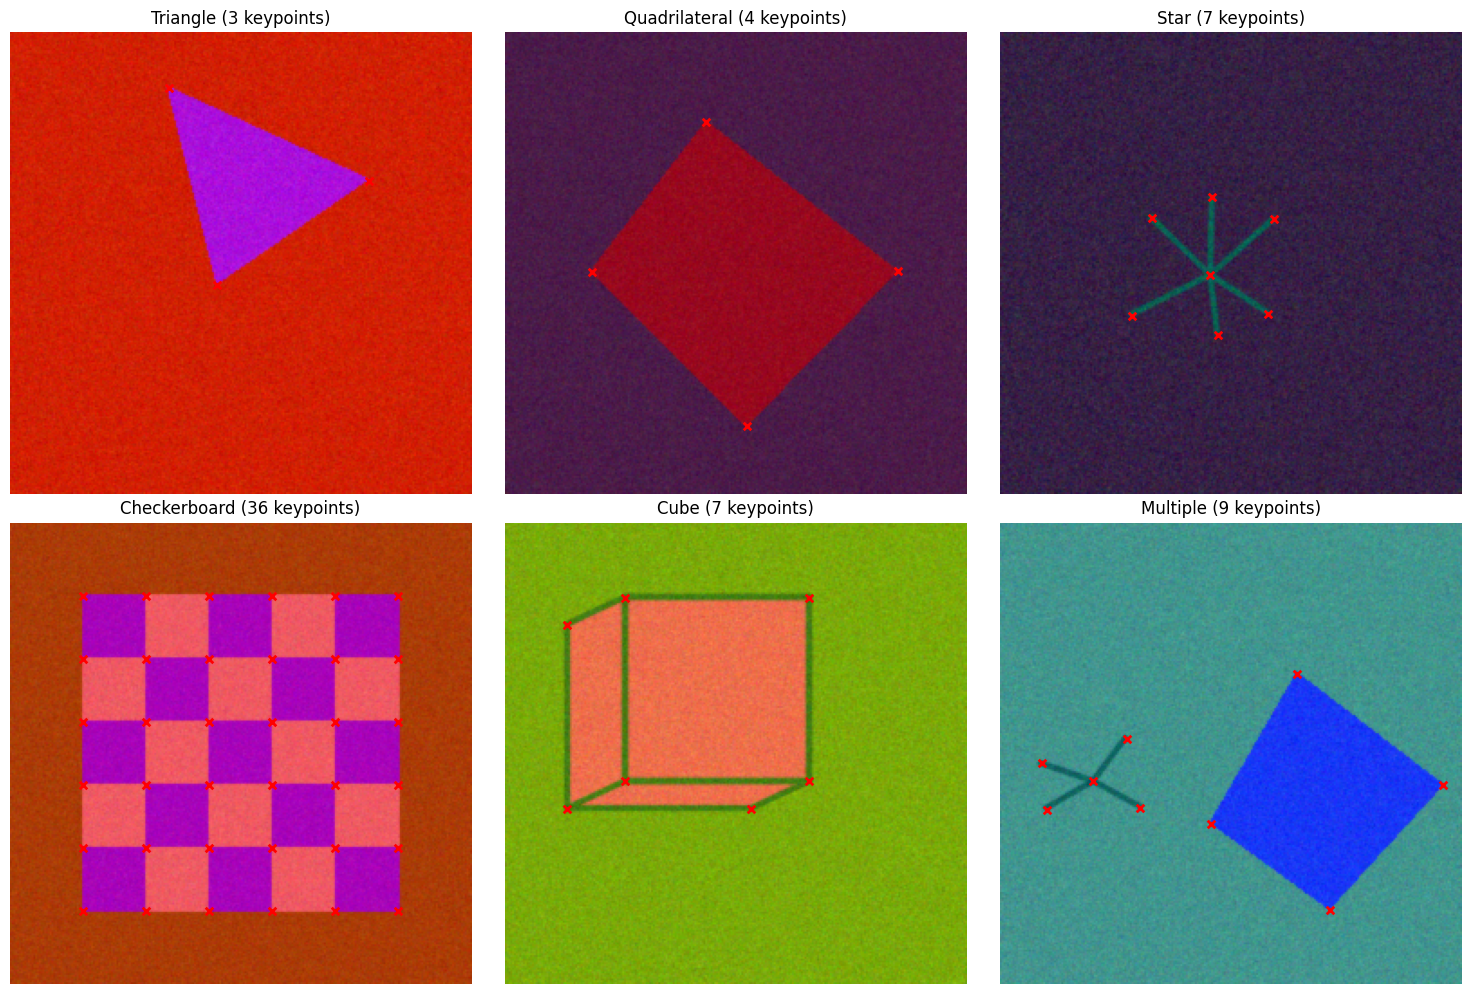

In [2]:
# Test and visualize

def visualize_sample(img, keypoints, title=""):
    """Visualize image with keypoints marked."""
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    if len(keypoints) > 0:
        plt.scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=50, marker='x')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Generate examples of each type
shape_types = ["triangle", "quadrilateral", "star", "checkerboard", "cube", "multiple"]

print("Generating examples without homography:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(256, 256, shape_type=shape_type, use_homography=False)
    axes[i].imshow(img)
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} ({len(keypoints)} keypoints)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()



Generating examples with homography:


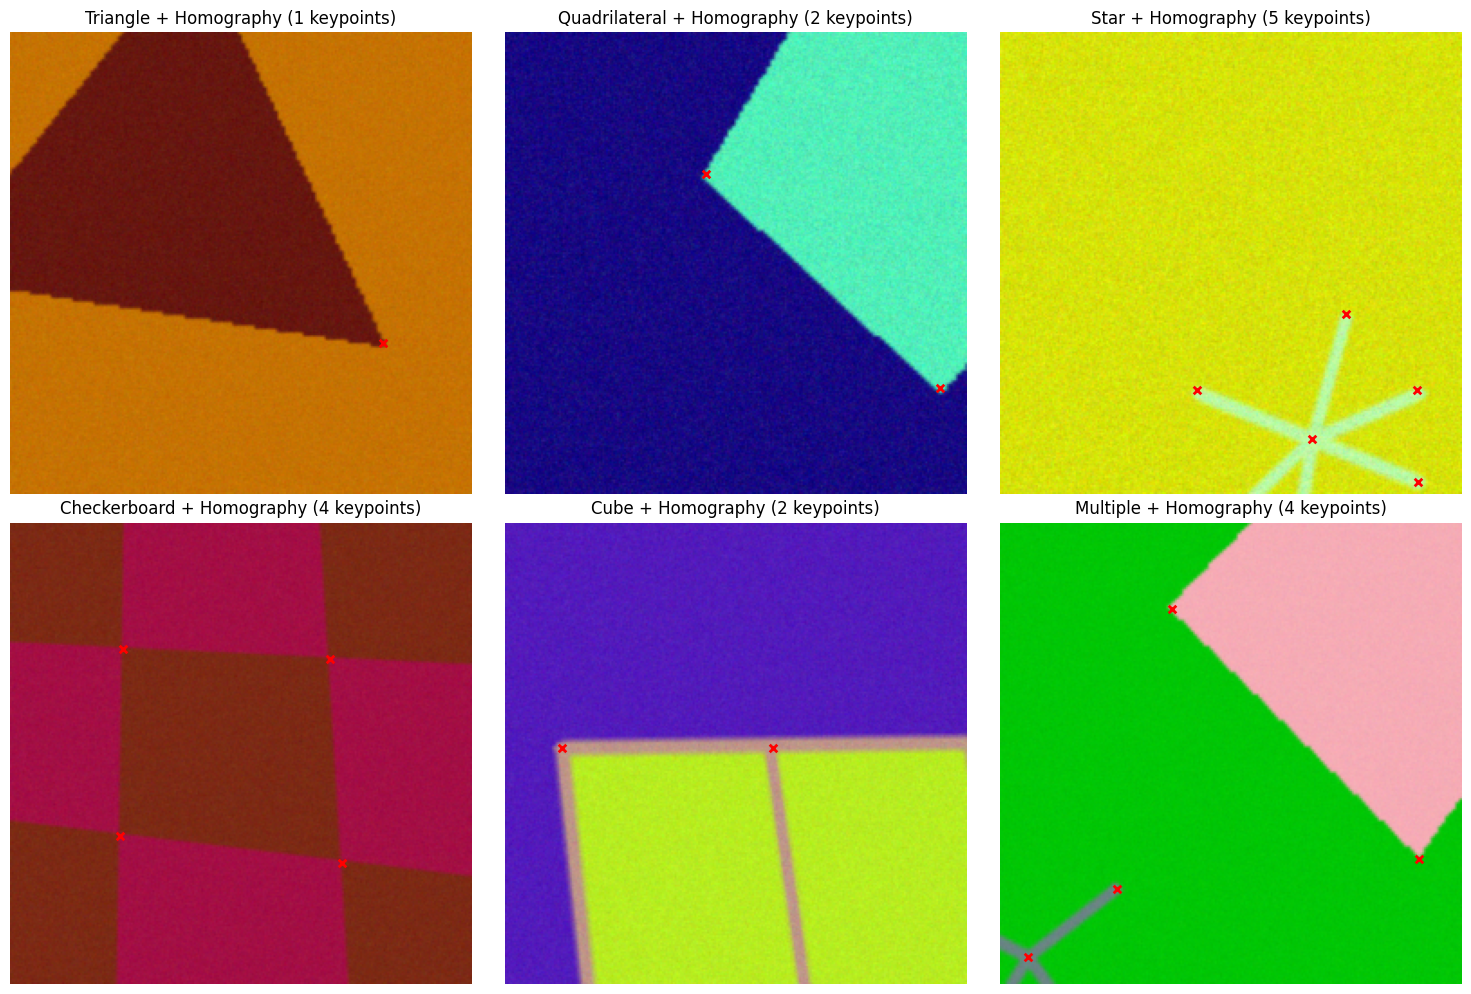

In [3]:
print("\nGenerating examples with homography:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(256, 256, shape_type=shape_type, use_homography=True)
    axes[i].imshow(img)
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} + Homography ({len(keypoints)} keypoints)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Generate and save dataset
print("Generating dataset with raw samples...")
dataset_generator = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    generate_fn=generate_synthetic_image,
    generate_kwargs={'width': 256, 'height': 256, 'shape_type': 'random'},
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=True
)

# Save to file
dataset_generator.save_to_file('pregenerated_samples.npz')
print("Dataset saved!")

Generating dataset with raw samples...
Pre-generating 100 base samples...
  100/100 samples
✓ Pre-generation complete!
✓ Saved 100 samples to pregenerated_samples.npz
Dataset saved!


In [5]:
# Load the same dataset twice - once without augmentation, once with
print("Loading dataset without augmentation (raw samples)...")
dataset_raw = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with augmentation...")
dataset_augmented = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nBoth datasets loaded!")

Loading dataset without augmentation (raw samples)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with augmentation...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Both datasets loaded!


Showing samples at indices: [63, 19, 93, 33]


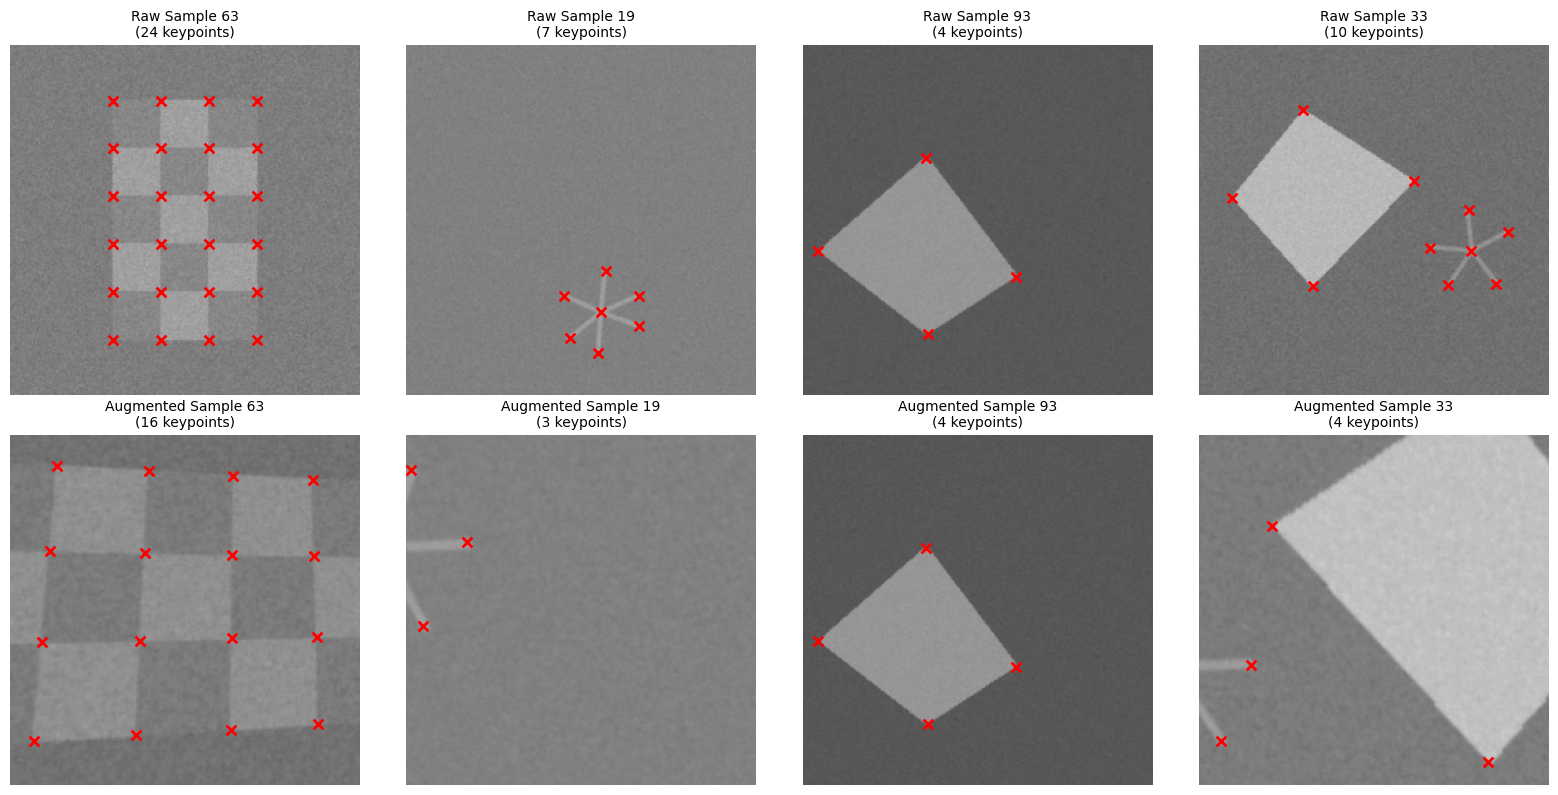

In [11]:
# Select 4 random sample indices
num_samples_to_show = 4
random_indices = random.sample(range(len(dataset_raw.pregenerated_data)), num_samples_to_show)

print(f"Showing samples at indices: {random_indices}")

fig, axes = plt.subplots(2, num_samples_to_show, figsize=(16, 8))

for col, idx in enumerate(random_indices):
    # Get raw sample at this index
    img_raw, target_raw = dataset_raw[idx]
    img_raw_np = img_raw.squeeze().numpy()  # (H, W)

    # Extract keypoints from target using helper function
    raw_kpts = extract_keypoints_from_target(target_raw)

    # Get augmented sample at THE SAME index
    img_aug, target_aug = dataset_augmented[idx]
    img_aug_np = img_aug.squeeze().numpy()  # (H, W)

    # Extract keypoints from augmented target using helper function
    aug_kpts = extract_keypoints_from_target(target_aug)

    # Plot raw sample
    axes[0, col].imshow(img_raw_np, cmap='gray', vmin=0, vmax=1)
    if len(raw_kpts) > 0:
        axes[0, col].scatter(raw_kpts[:, 0], raw_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[0, col].set_title(f'Raw Sample {idx}\n({len(raw_kpts)} keypoints)', fontsize=10)
    axes[0, col].axis('off')

    # Plot augmented sample
    axes[1, col].imshow(img_aug_np, cmap='gray', vmin=0, vmax=1)
    if len(aug_kpts) > 0:
        axes[1, col].scatter(aug_kpts[:, 0], aug_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[1, col].set_title(f'Augmented Sample {idx}\n({len(aug_kpts)} keypoints)', fontsize=10)
    axes[1, col].axis('off')

axes[0, 0].set_ylabel('Raw (No Augmentation)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('With Augmentation', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()